# Exercise 2 | TKO_7092 Evaluation of Machine Learning Methods 2025
## deadline: 12.2.2025 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Ghufran Ullah

Student number: 2411327

Student email: ghufran.u.ullah@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=7 (7NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 7-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 7NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 in 'Evaluating spatial models with spatial cross-validation' for help). Estimate the water permeability prediction performance (using 7NN model and C-index) with the following distance parameter values: d = 0, 20, 40, ..., 300 (that is, 20 meter intervals from 0m to 300m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. You can use third-party libraries (e.g. Scikit-learn) if you want for implementing e.g. the 7-nearest neighbor. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [9]:
# In this cell, import all the libraries that you need. For example: 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


### Read in the datasets

In [4]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).

# Step 2: Read in the datasets
input_data = pd.read_csv("input.csv")
output_data = pd.read_csv("output.csv")
coordinates_data = pd.read_csv("coordinates.csv")

# Print dataset dimensions
print("Input Data Dimensions:", input_data.shape)
print("Output Data Dimensions:", output_data.shape)
print("Coordinates Data Dimensions:", coordinates_data.shape)


Input Data Dimensions: (1690, 75)
Output Data Dimensions: (1690, 1)
Coordinates Data Dimensions: (1690, 2)


In [40]:
input_data.head()

,-5.319627000693968877e-02,-2.192960385319173422e-01,2.100203710608411767e-01,7.044248857837395184e-01,3.394767803718533039e-01,4.126382430764711229e-01,3.310743813668211577e-01,-3.441122815090714299e-02,-1.844805104342988333e-01,3.073453044043934490e-01,...,2.195409042303054503e-01,5.391189660033040010e-01,-6.452537679872522025e-01,-5.199176372857478023e-01,-4.470893658464750731e-01,5.540967867205053299e-01,8.728506609344185985e-02,-1.091932125630579592e-01,-9.136390741008875160e-01,-4.614792137924043081e-01
0,-0.632098,-0.682804,-0.285522,-0.369542,-0.138305,2.489725,2.051755,-0.034411,-0.246906,-0.226797,...,0.219541,-0.169259,-0.645254,2.475438,-0.447089,-0.288927,-0.035919,-1.481978,-1.087664,-0.461479
1,-0.674980,-0.597421,-0.568689,-0.983237,-0.828435,-0.496087,-0.451053,-0.034411,-0.324938,-0.627405,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.375320,-0.159124,0.349947,0.134707,-0.809315
2,-0.331927,-0.154649,1.307292,0.090730,0.419107,1.061728,0.956776,-0.034411,-0.301529,-0.360333,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.383278,0.703308,0.467238,0.107450,-0.832933
3,-0.610657,-0.673046,-0.161636,-0.522966,-0.377196,0.672274,0.800351,-0.034411,-0.363954,-0.961244,...,-1.047724,-0.877636,2.098494,0.977760,1.960643,-0.296657,0.087285,-0.333328,-0.636876,-0.542584
4,-0.256884,-0.220516,1.360386,0.857849,0.684542,-0.236451,0.018223,-0.034411,-0.223497,0.107042,...,0.219541,1.247497,3.013076,-0.519918,-0.447089,-0.164565,0.210490,0.735021,-0.729130,-0.587591


In [41]:
output_data.head()

,5.8359
0,6.2592
1,6.9041
2,6.2065
3,7.0642
4,6.8203


In [42]:
coordinates_data.head()

,4.5914e+05,7.5242e+06
0,461590.0,7549000.0
1,462040.0,7549300.0
2,462040.0,7549300.0
3,462130.0,7549400.0
4,462200.0,7547400.0


### Standardization of the predictor features (input.csv)

In [6]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 

# Step 3: Standardization of the predictor features (input.csv)
scaler = StandardScaler()
input_data_scaled = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

### Functions and analysis code

In [ ]:
# Include here all the functions and other relevant code that you need in order to implement the task.

# Note! Utilize the following two functions in your implementation:

### Function for calculating C-index ###
# y: array containing true label values.
# yp: array containing the predicted label values.
def cindex(y, yp):
    n = 0
    h_num = 0 
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n


### Function for calculating the pairwise spatial distances between the data points ###
# The function will return a n-by-n matrix of Euclidean distances. For example, the
# distance_matrix element at indices i,j will contain the spatial distance between 
# data point i and j. Note that the element value is 0 always when i==j.
# coordinate_array: n-by-2 array containing the coordinates of the exercise data points.
def cdists(coordinate_array):
    number_of_observations = coordinate_array.shape[0]
    distance_matrix = np.zeros((number_of_observations, number_of_observations))
    for i in range(0, number_of_observations):
        distance_matrix[i, :] = np.sqrt(np.sum((coordinate_array - coordinate_array[i])**2, axis=1))
    return distance_matrix

In [16]:
def spatial_knn_cv(input_data, output_data, coordinates_data, k=7, distance_thresholds=range(0, 301, 20)):
    distances = cdists(coordinates_data.values)
    cindex_results = []
    
    for d in distance_thresholds:
        y_true = []
        y_pred = []
        
        for i in range(len(output_data)):
            train_indices = np.where(distances[i] > d)[0]
            if len(train_indices) < k:
                continue
            
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(input_data.iloc[train_indices], output_data.iloc[train_indices].values.ravel())
            pred = knn.predict(input_data.iloc[[i]])[0] 
            
            y_true.append(output_data.iloc[i, 0])
            y_pred.append(pred)
        
        if len(y_true) > 1:
            cindex_results.append(cindex(np.array(y_true), np.array(y_pred)))
        else:
            cindex_results.append(None)
    
    return distance_thresholds, cindex_results


In [17]:
# Running the spatial KNN cross-validation
thresholds, cindex_values = spatial_knn_cv(input_data_scaled, output_data, coordinates_data)

In [20]:
print(cindex_values)

[0.7141470586586385, 0.7063399459553402, 0.7006271338950838, 0.692010963104989, 0.6847410033021063, 0.6806631262929512, 0.616538352647011, 0.5995540895100661, 0.5956293343648912, 0.5940536157783496, 0.590367478457821, 0.5874290803998408, 0.5864644476960941, 0.5865709672536454, 0.5867139277124644, 0.5860043813175909]


In [43]:
print(thresholds)

range(0, 301, 20)


### Results for spatial leave-one-out cross-validation with 7-nearest neighbor regression model

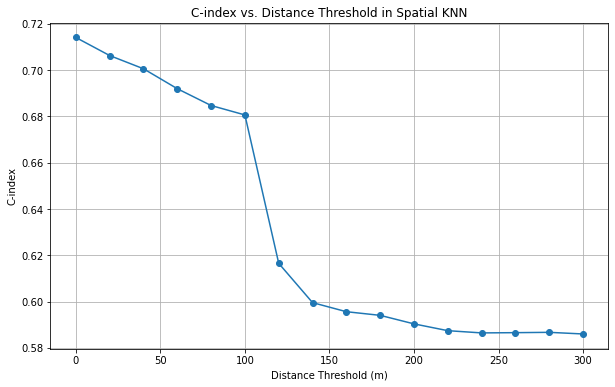

In [22]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 7-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

plt.figure(figsize=(10,6))
plt.plot(thresholds, cindex_values, marker='o')
plt.xlabel("Distance Threshold (m)")
plt.ylabel("C-index")
plt.title("C-index vs. Distance Threshold in Spatial KNN")
plt.grid()
plt.show()

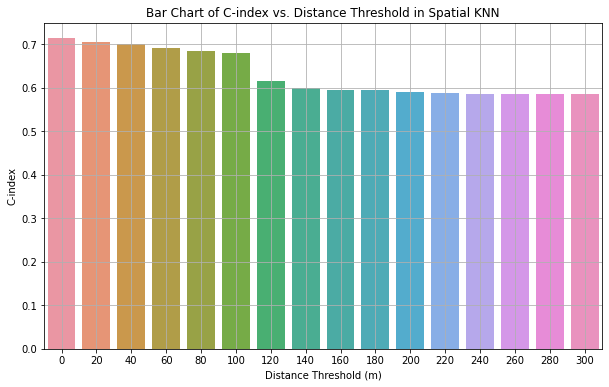

In [44]:
# Convert None values to NaN
cindex_values_clean = [val if val is not None else np.nan for val in cindex_values]

# Remove NaN values for plotting
thresholds_clean = np.array(thresholds)[~np.isnan(cindex_values_clean)]
cindex_values_clean = np.array(cindex_values_clean)[~np.isnan(cindex_values_clean)]

# Plot the cleaned data
plt.figure(figsize=(10,6))
sns.barplot(x=thresholds_clean, y=cindex_values_clean)
plt.xlabel("Distance Threshold (m)")
plt.ylabel("C-index")
plt.title("Bar Chart of C-index vs. Distance Threshold in Spatial KNN")
plt.grid()
plt.show()


## Analysis of the results

### In this cell, you need to answer the client's questions:


1. What happens to the 7NN performance as the prediction distance increases?


2. Do you think the results behave as was somewhat expected? Do they make sense, why?


3. If we require that the 7NN must have at least C-index performance of 0.68, then up to what distance should we trust the 7NN predictions, based on the results?

1. What happens to the 7NN performance as the prediction distance increases?

**Answer** I think as the geographical distance between known and unknown data points increases, the performance of the 7NN regression model declines as seen from the plot. This cab be seen from the C-index values, which start high at 0.714 when using nearby data points but gradually decrease as the distance threshold increases. I can see the model maintains relatively good predictive accuracy up to 100m, with a C-index above 0.68. However, beyond this threshold, there is a sharp decline in performance that can be seen, with the C-index dropping below 0.60 after 140m. At distances of 200m and beyond, the performance stabilizes around 0.586, which indicates a significant reduction in predictive accuracy. This trend suggests that the spatial correlation between data points weakens as the distance increases, which leads to less reliable predictions.

2. Do the results behave as expected? Do they make sense? Why?
**Answer** Yes, i think the results behave as expected and are consistent with spatial autocorrelation principles in geostatistical modeling. In spatial analysis, the closer data points mostly tend to have stronger relationships due to underlying spatial patterns. Therefore, it makes sense that the 7NN model performs well when using neighbors within 100m but it loses accuracy when distant points are used for prediction. I think the observed sharp decline beyond 100m indicates that after this distance, the spatial influence of nearby observations diminishes, which in turn reduces the model’s predictive power. The stabilization of the C-index at around 0.586 for large distances seems to suggests that at these distances, the predictive relationship becomes weaker, which makes spatial proximity less relevant. These observations align with general expectations for spatial models, which reinforces that geographical proximity plays a key role in predictive accuracy.

3. If we require that the 7NN must have at least C-index performance of 0.68, up to what distance should we trust the 7NN predictions?
**Answer** From the plot, the C-index drops below 0.68 around 100 meters. I thik this means that:
Up to ~100m, the model provides reliable predictions based on C-index (C-index ≥ 0.68).
Beyond 100m, predictions become less trustworthy.
Thus, from this what I can conclude is that for practical use, the 7NN model should be trusted for distances up to approximately 100 meters for ensuring reliable water permeability predictions.